# **NBA Anaysis: Visualisations in Matplotlib**

## Objectives

* Load output data set produced in 04_etl_b.ipynb: nba-data-1980plus.csv
Produce some visualisations with this data.

## Inputs

* Files used: 
nba-data-1980plus.csv


## Outputs

* File produced:


## Additional Comments

* This dataset contains essential information about the wins, losses, and other statistics for each MVP candidate from 1980-2018
* Note: columns listed in this dataset did not have any information, some have been gleaned from the column titles and listed below where known or not obvious from the column title.

Rank: MVP rank, 1 denotes the winner
Player: Name of player in the format <First Name> < Last Name>
Age: Age at time of award
Tm: Short name of team, eg. LAL = LA Lakers
First: Number of first place votes
Pts Won: Number of voting points won
Pts Max: Maximum number of points possible
Share: Number of voting points as a percentage of the maximum number of points possible
G: Number of games played in the regular season (Regular seasons are 82 games apart from shortened seasons eg. player strike, pandemic etc)
MP: Mean minutes played per game
PTS: Mean number of points scored per game
TRB: Mean number of rebounds per game (includes both offensive and defensive rebounds)
AST: Mean number of assists per game
STL: Mean number of steals per game
BLK: Mean number of blocks per game
FG%: Field goal percentage (number of shots scored divided by the number of shots taken)
3P%: 3 Point percentage (number of 3 point shots scored divided by the number of 3 point shots taken)
FT%: Free throws percentage (number of free throws scored divided by the number of free throws taken)
WS: Win share
WS/48: Win share per 48 minutes
year: The year of the award
team: Full name of the team eg. Philadelphia 76ers
W: Number of games won
W/L%: Number of regular season games won (the number of games won divided by the number of games in the season, usually 82 games)
seed: presume to be seeding of the team in their Conference at the end of the season. The lowest number has won the most games.
player_efficiency_rating:
true_shooting_percentage: Takes into account all shooting statistics, field goals 3 pointers and free throws
three_point_attempt_rate
free_throw_attempt_rate
offensive_rebound_percentage
defensive_rebound_percentage: 
total_rebound_percentage
assist_percentage
steal_percentage
block_percentage
turnover_percentage
usage_percentage
offensive_win_shares
defensive_win_shares
win_shares
win_shares_per_48_minutes
offensive_box_plus_minus
defensive_box_plus_minus
box_plus_minus
value_over_replacement_player

* Note: data set has records from 1980-2018.




---

# Section 1

# Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Load the dataset

In [2]:
df = pd.read_csv("../data/outputs/nba-data-1980plus.csv")

# Look at data

In [3]:
df.head()


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,Name,Surname,First_Name
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,5.3,14.8,0.227,4.8,2.4,7.2,7.3,Kareem,Abdul-Jabbar,K.
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,5.2,12.5,0.213,5.7,1.9,7.6,6.8,Julius,Erving,J.
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,1.3,10.6,0.173,5.5,-1.6,3.9,4.4,George,Gervin,G.
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,5.6,11.2,0.182,3.0,1.5,4.5,4.8,Larry,Bird,L.
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,Tiny,Archibald,T.


# Look at shape

In [4]:
df.shape

(642, 48)

# Check data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           642 non-null    object 
 1   Player                         642 non-null    object 
 2   Age                            642 non-null    int64  
 3   Tm                             642 non-null    object 
 4   First                          642 non-null    float64
 5   Pts Won                        642 non-null    float64
 6   Pts Max                        642 non-null    int64  
 7   Share                          642 non-null    float64
 8   G                              642 non-null    int64  
 9   MP                             642 non-null    float64
 10  PTS                            642 non-null    float64
 11  TRB                            642 non-null    float64
 12  AST                            642 non-null    flo

# Check null values

In [6]:
df.isnull().sum()

Rank                             0
Player                           0
Age                              0
Tm                               0
First                            0
Pts Won                          0
Pts Max                          0
Share                            0
G                                0
MP                               0
PTS                              0
TRB                              0
AST                              0
STL                              0
BLK                              0
FG%                              0
3P%                              0
FT%                              0
WS                               0
WS/48                            0
year                             0
team                             0
W                                0
W/L%                             0
seed                             0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_r

# Check for duplicates

In [7]:
df.duplicated().sum()

0

---

# Section 2

# A visualisation in Seaborn to show a heat map of all numerical statistics.


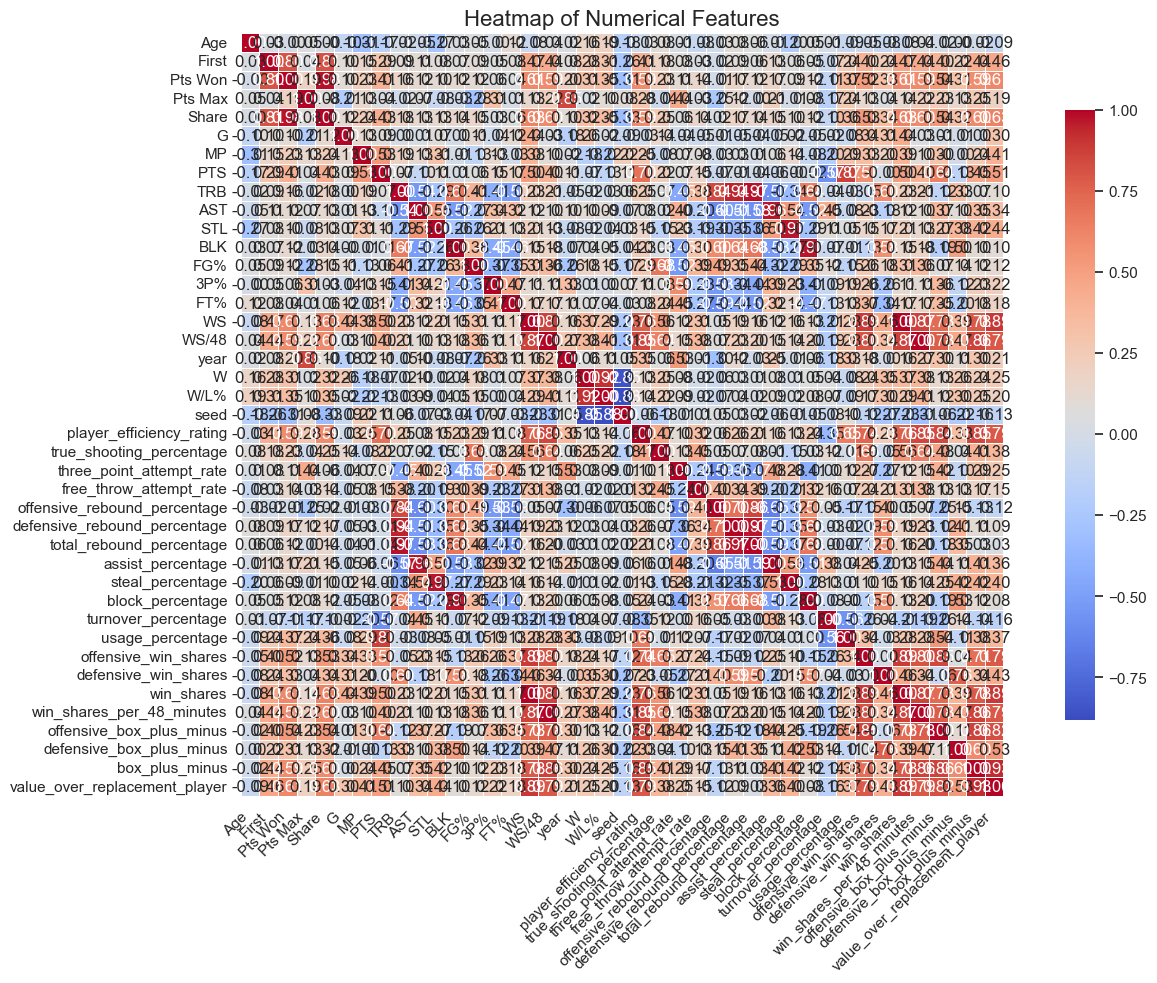

In [10]:
# Select only numerical features
numerical_df = df.select_dtypes(include='number')

# Compute full correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))


heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Title and formatting
plt.title("Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

#save to an external png image file
plt.savefig('../data/outputs/images/sns_heatmap_of_numerical_features.png', dpi=300)

#show the plot

plt.show()

# Create a heatmap with fewer statistics, in this case PTS, TRB, AST, STL, BLK, true_shooting_percentage

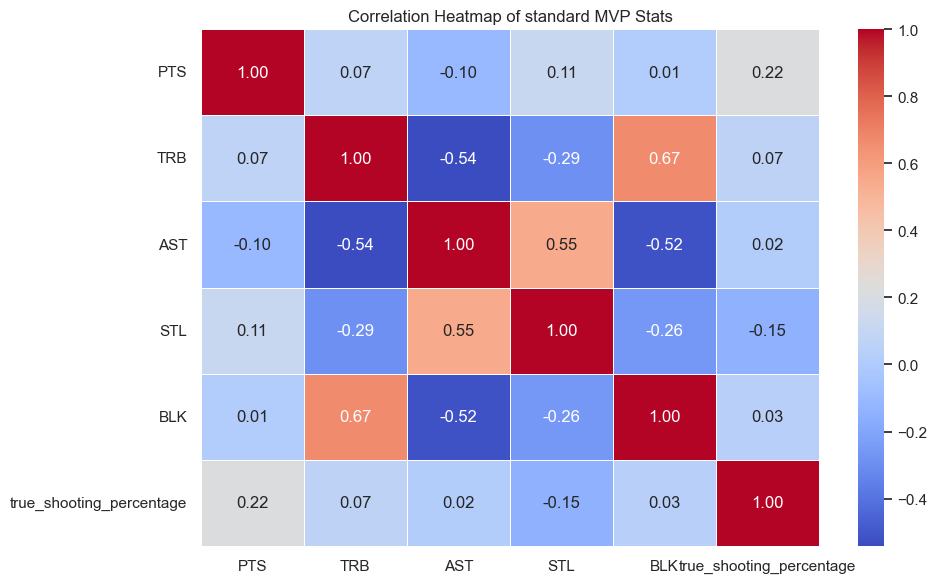

In [11]:
## Select the relevant columns
stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'true_shooting_percentage']
data = df[stats]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and layout
plt.title('Correlation Heatmap of standard MVP Stats')
plt.tight_layout()

# Save the heatmap to an external PNG image file
plt.savefig('../data/outputs/images/sns_mvp_standard_stats_heatmap.png', dpi=300)
plt.show()

# Save the pie chart as an image file in the ../data/outputs/images folder
# Saved as png file but other image formats are also available
# dpi=300 for high-resolution output
# bbox_inches='tight' trims extra whitespace

# Create a player-by-stat normalised heatmap with clustering
- Group similar stats together using hierarchical clustering
- Normalise values across players

StandardScaler transforms each stat to have mean 0 and standard deviation 1.

clustermap() automatically groups similar stats and players using hierarchical clustering.

annot=True shows the normalized values inside each cell.

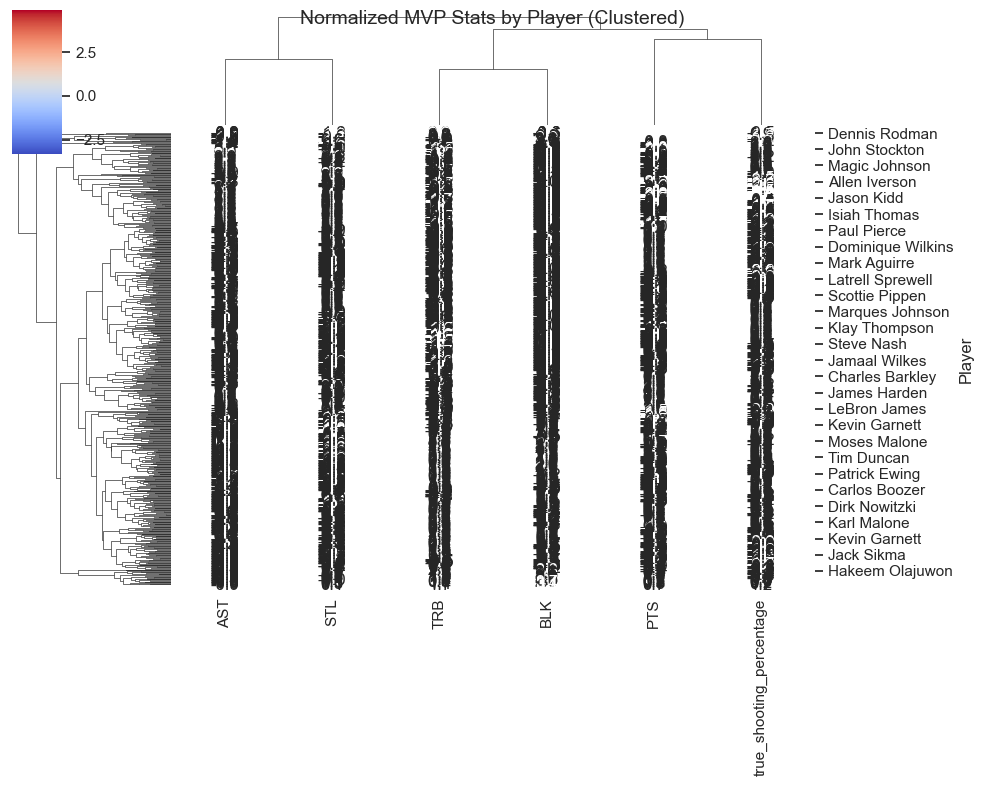

In [13]:
# Normalize across players (rows)
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=stats, index=df['Player'])

# Create clustered heatmap
sns.clustermap(
    normalized_data,
    cmap='coolwarm',
    figsize=(10, 8),
    metric='euclidean',
    method='average',
    standard_scale=None,  # Already normalized
    linewidths=0.5,
    annot=True,
    fmt=".1f"
)

plt.suptitle('Normalized MVP Stats by Player (Clustered)', fontsize=14)
plt.savefig('../data/outputs/images/sns_normalized_mvp_heatmap.png', dpi=300)
plt.show()

# Look at statistics against percentage of the MVP vote (Share)
Look at PTS (points per game), W/L% (win/loss percentage), WS (win shares), WS/48 (win shares per 48 minutes), player_efficiency_rating, usage_percentage, box_plus_minus, offensive_box_plus_minus, defensive_box_plus_minus, value_over_replacement_player
Note : code is re-used changing the relevant variables and titles

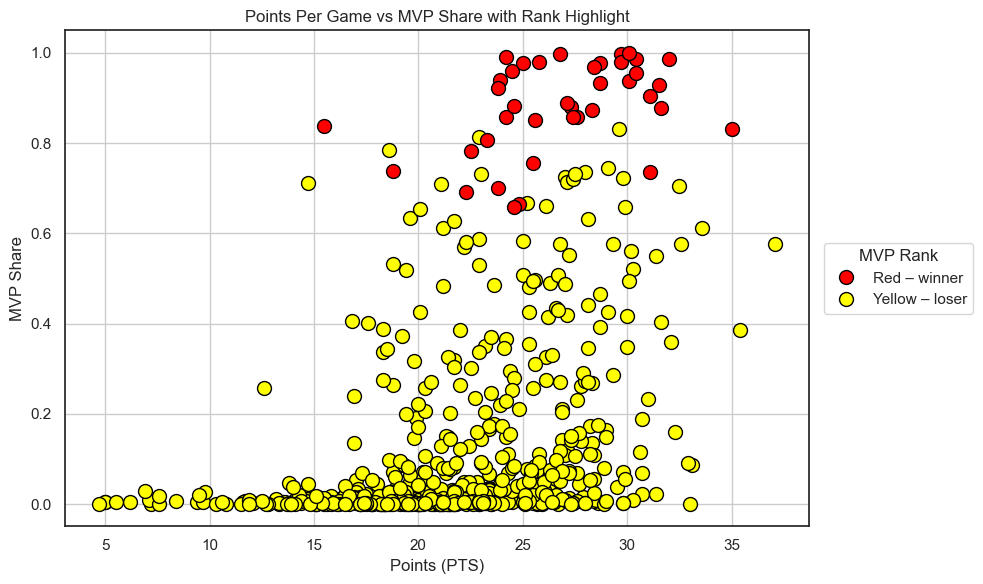

In [22]:
# Split data into winners and others - note that rank is not a numerical feature

winners = df[df['Rank'] == "1"]
others = df[df['Rank'] != "1"]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['PTS'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['PTS'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Points (PTS)')
plt.ylabel('MVP Share')
plt.title('Points Per Game vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_pts_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter plot of win/loss percentage by percentage of MVP votes

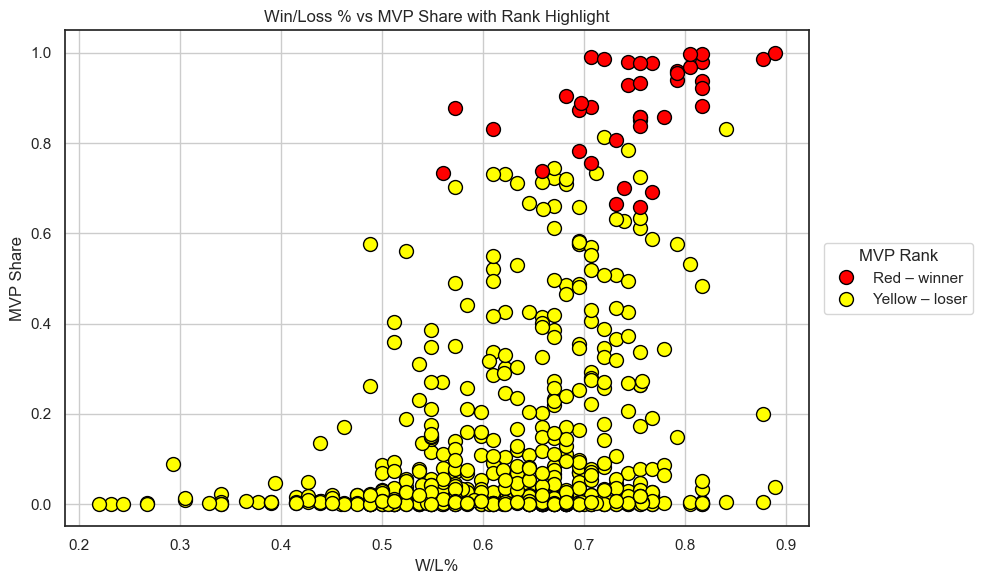

In [23]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['W/L%'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['W/L%'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('W/L%')
plt.ylabel('MVP Share')
plt.title('Win/Loss % vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_winloss_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of Win Shares (WS) by percentage of MVP votes

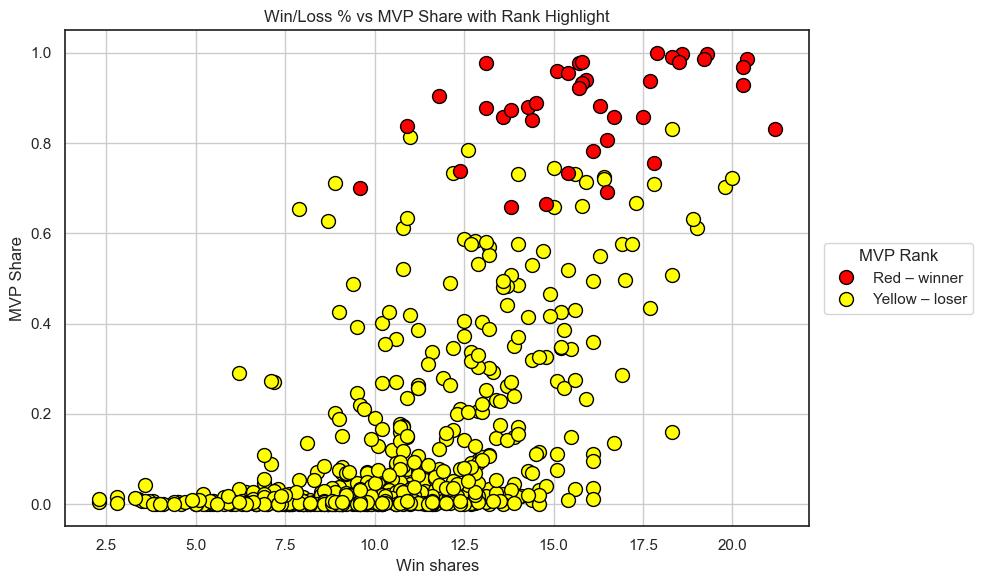

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['WS'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['WS'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Win shares')
plt.ylabel('MVP Share')
plt.title('Win Shares vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_winshares_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of Win Shares per 48 minutes (WS/48) by percentage of MVP votes

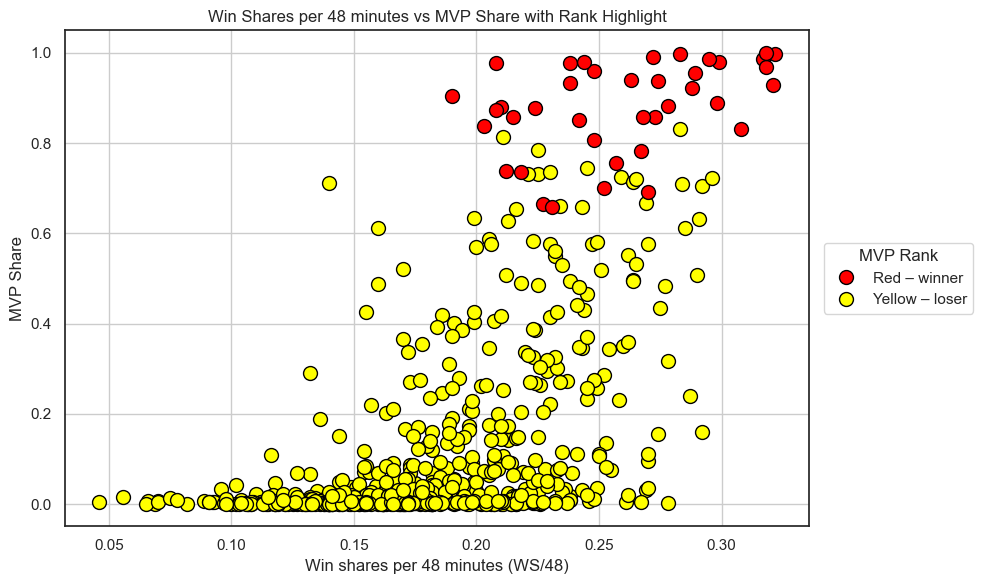

In [26]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['WS/48'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['WS/48'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Win shares per 48 minutes (WS/48)')
plt.ylabel('MVP Share')
plt.title('Win Shares per 48 minutes vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_winshares48_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of Player Efficiency Rating (commonly abbreviated to PER) by percentage of MVP votes

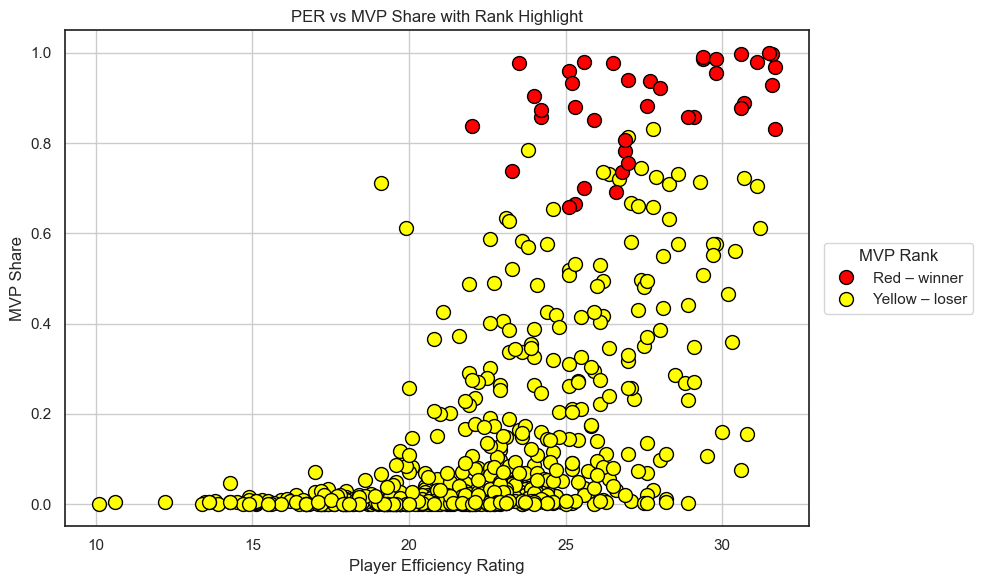

In [27]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['player_efficiency_rating'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['player_efficiency_rating'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Player Efficiency Rating')
plt.ylabel('MVP Share')
plt.title('PER vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_per_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of Usage Percentage by percentage of MVP votes

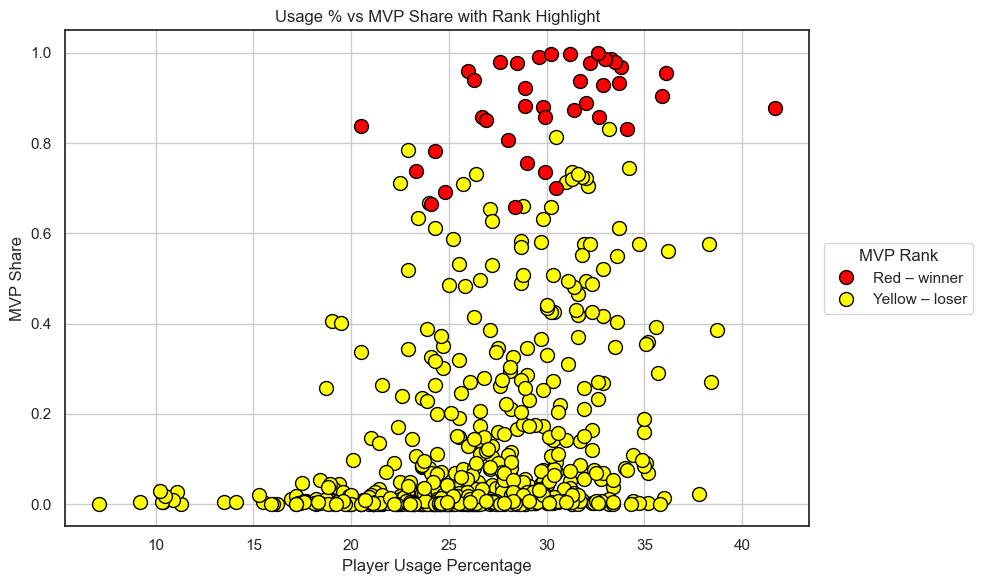

In [28]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['usage_percentage'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['usage_percentage'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Player Usage Percentage')
plt.ylabel('MVP Share')
plt.title('Usage % vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_usage_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of offensive_box_plus_minus by percentage of MVP votes

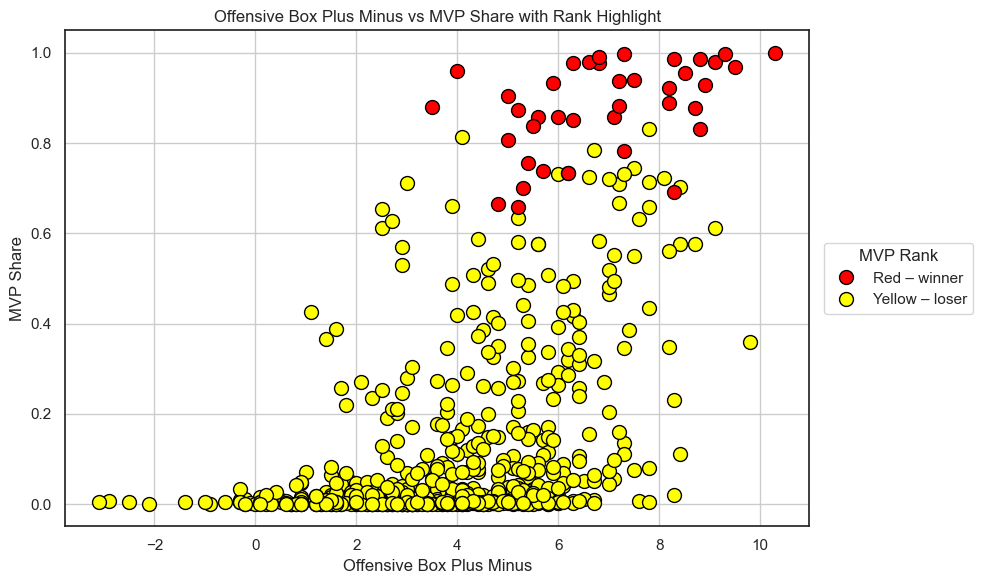

In [29]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['offensive_box_plus_minus'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['offensive_box_plus_minus'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Offensive Box Plus Minus')
plt.ylabel('MVP Share')
plt.title('Offensive Box Plus Minus vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_off_boxplusminus_vs_share_scatter.png', dpi=300)
plt.show()

# Scatter of defensive_box_plus_minus by percentage of MVP votes

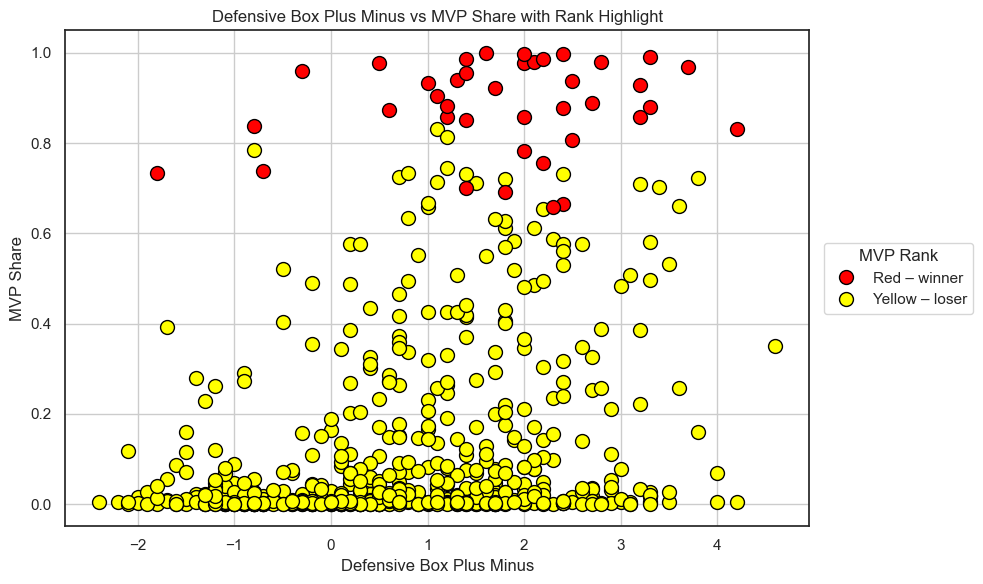

In [30]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['defensive_box_plus_minus'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['defensive_box_plus_minus'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Defensive Box Plus Minus')
plt.ylabel('MVP Share')
plt.title('Defensive Box Plus Minus vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_def_boxplusminus_vs_share_scatter.png', dpi=300)
plt.show()


# Scatter of box_plus_minus by percentage of MVP votes

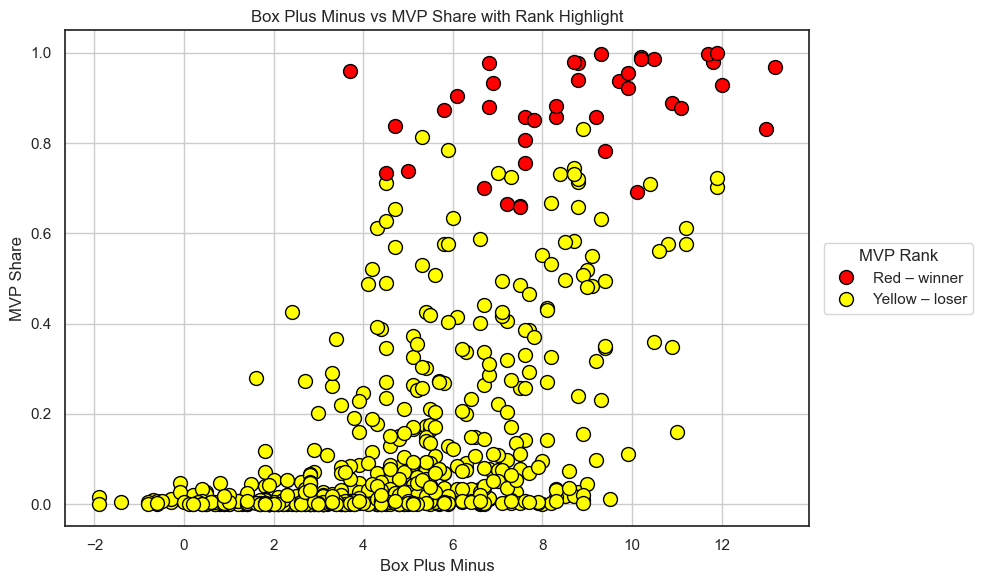

In [31]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot losers first (yellow)
plt.scatter(
    others['box_plus_minus'],
    others['Share'],
    c='yellow',
    s=100,
    edgecolors='black'
)

# Plot winners on top (red)
plt.scatter(
    winners['box_plus_minus'],
    winners['Share'],
    c='red',
    s=100,
    edgecolors='black'
)

# Add labels and title
plt.xlabel('Box Plus Minus')
plt.ylabel('MVP Share')
plt.title('Box Plus Minus vs MVP Share with Rank Highlight')

# Add custom legend outside the grid
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Red – winner',
           markerfacecolor='red', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Yellow – loser',
           markerfacecolor='yellow', markersize=10, markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title='MVP Rank',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.grid(True)
plt.tight_layout()
plt.savefig('../data/outputs/images/sns_boxplusminus_vs_share_scatter.png', dpi=300)
plt.show()

# 

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
